In [1]:
# Raw Package
import numpy as np
import pandas as pd

import APIBackend as back

In [2]:

stock = back.stock()
# stock.ticker
ticker = '^GSPC' ### You Can Change the Ticker
stock_data = stock.getDailyStockInfo(ticker=ticker)




^GSPC
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-01,2952.330078,2954.129883,2923.360107,2923.729980,2923.729980,3645850000
2019-05-02,2922.159912,2931.679932,2900.500000,2917.520020,2917.520020,3778890000
2019-05-03,2929.209961,2947.850098,2929.209961,2945.639893,2945.639893,3338120000
2019-05-06,2908.889893,2937.320068,2898.209961,2932.469971,2932.469971,3181520000
2019-05-07,2913.030029,2913.030029,2862.600098,2884.050049,2884.050049,3767100000
...,...,...,...,...,...,...
2022-08-03,4107.959961,4167.660156,4107.959961,4155.169922,4155.169922,3544410000
2022-08-04,4154.850098,4161.290039,4135.419922,4151.939941,4151.939941,3565810000
2022-08-05,4115.870117,4151.580078,4107.310059,4145.189941,4145.189941,3540260000


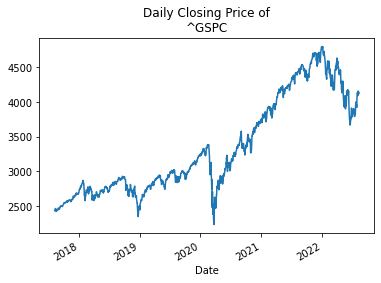

In [3]:
stock.plot_close_stock(stock_data)
stock.trim_data(stock_data, month=5, year=2019)

C:\Users\meowm\OneDrive\Desktop\Winter2022\Python\StockModeling\APIBackend.py:58: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_add = seasonal_decompose(data.Close,


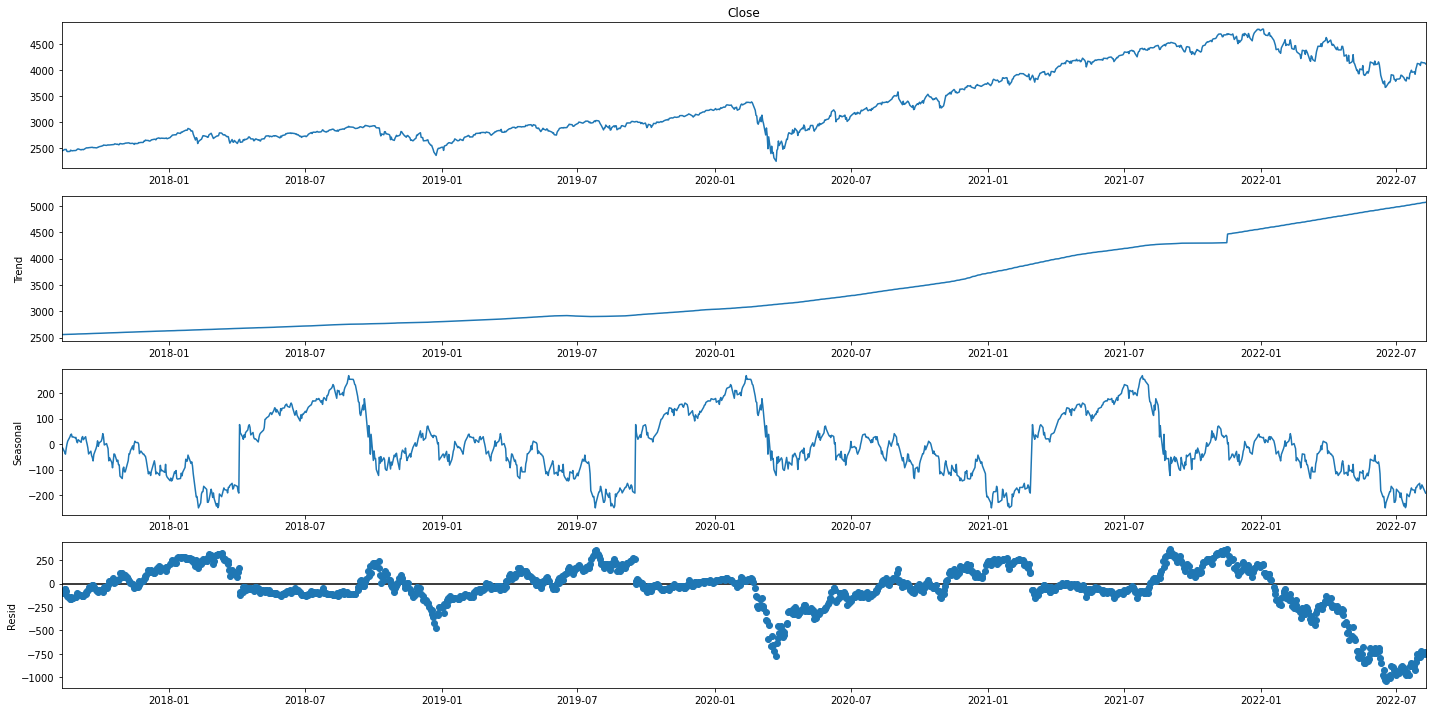

In [4]:
stock.getETSPlot()

In [5]:
%pip show statsmodels

Name: statsmodels
Version: 0.12.1
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: c:\users\meowm\anaconda3\lib\site-packages
Requires: patsy, numpy, pandas, scipy
Required-by: statsforecast, pmdarima
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install statsmodels==0.13.0

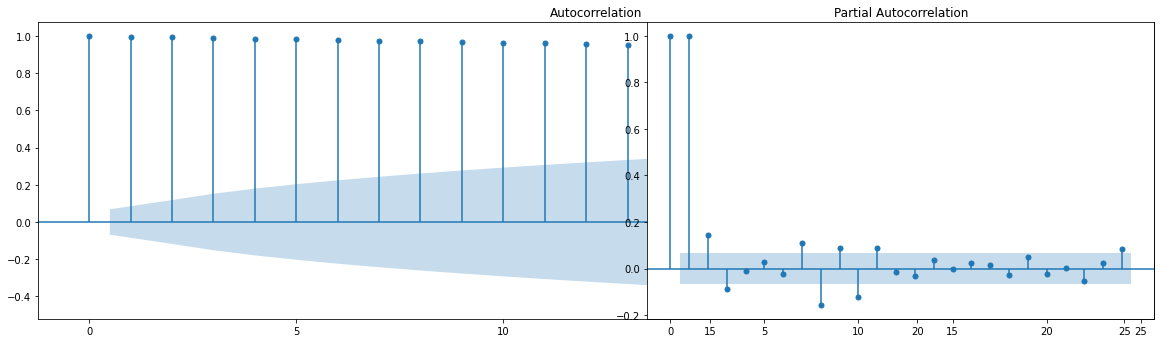

In [7]:
stock.plotDiagnostics()

In [8]:
import statsmodels.api as sm
######################## Modeler Specifications ########################## You Can Change This Figures########################
ar = 2
ma = 3
###########################

stock.ARMA(ar,ma)



C:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  826
Model:                     ARMA(2, 3)   Log Likelihood               -4360.239
Method:                       css-mle   S.D. of innovations             47.302
Date:                Tue, 09 Aug 2022   AIC                           8734.478
Time:                        17:59:17   BIC                           8767.495
Sample:                             0   HQIC                          8747.143
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3607.8155    422.315      8.543      0.000    2780.094    4435.537
ar.L1.Close     0.1339      0.041      3.297      0.001       0.054       0.213
ar.L2.Close     0.8606      0.041     21.220    

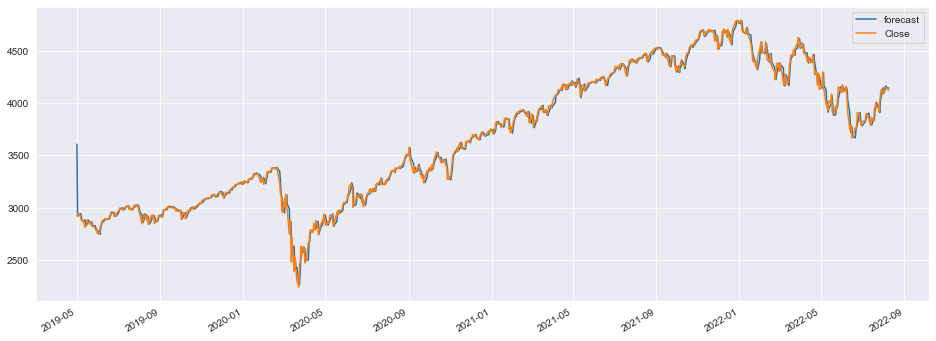

In [9]:
stock.plotARMAFit()


In [10]:
stock.forecastPlot()

MAE: 33.84279593044512
MAPE: 0.00959592436363112


alt.LayerChart(...)

In [11]:
stock.saveDataFrame(save = True)

DateFrame was saved as: 09-08-2022_^GSPC_Forecast.csv


In [12]:
######################## Modeler Specifications ########################## You Can Change This Figures########################
ar = [1]
ma = [12]

###########################

stock.ARIMA(ar,ma)



C:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  826
Model:             ARIMA(1, 1, [12])x(1, 1, 1, 52)   Log Likelihood               -4157.738
Date:                             Tue, 09 Aug 2022   AIC                           8325.477
Time:                                     18:00:07   BIC                           8348.728
Sample:                                          0   HQIC                          8334.423
                                             - 826                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1315      0.021     -6.164      0.000      -0.173      -0.090
ma.L12         0.0184      

C:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [13]:
# fig = plt.figure(figsize=(20,12))
# ax1 = fig.add_subplot(211)
# # fig = sm.graphics.tsa.plot_acf(stock_data.Close.dropna(),lags=24,ax=ax1)
# fig = sm.graphics.tsa.plot_acf(results.resid,lags=24,ax=ax1)
# ax2 = fig.add_subplot(212)
# # fig = sm.graphics.tsa.plot_pacf(stock_data.Close.dropna(),lags=24,ax=ax2)
# fig = sm.graphics.tsa.plot_pacf(results.resid,lags=24,ax=ax2)



In [14]:
stock.forecastPlot()

MAE: 41.32790600675467
MAPE: 0.01203059355453306


alt.LayerChart(...)

In [15]:
stock.saveDataFrame(save = True)

DateFrame was saved as: 09-08-2022_^GSPC_Forecast.csv
